In [ ]:
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.utils import shuffle

train_data = pd.read_csv('mean_variance.csv') # Load training data
test_data = pd.read_csv('mean_variance_test.csv') # Load test data
all_data = pd.concat([train_data,test_data])
print(all_data)


                   file  r_arm_mean  ...  l_hip_variance  class
0   20211024_221837.mp4  146.130091  ...        6.954082      0
1   20211024_221843.mp4  146.964444  ...       36.589102      0
2   20211024_221849.mp4  132.262152  ...        6.896821      0
3   20211024_221854.mp4  129.460933  ...        3.677057      0
4   20211024_221859.mp4  145.072982  ...       27.149071      0
..                  ...         ...  ...             ...    ...
3             Bad 5.mov  238.301892  ...       28.123903      0
4             Bad 6.mov  233.855052  ...        1.977847      0
5               Bad.mov  212.406343  ...      241.859238      0
6            Good 2.mov  150.567713  ...       19.678639      1
7            Good 3.mov  180.774950  ...    17002.579070      1

[81 rows x 14 columns]


In [ ]:
# Use 

# Split into training data for X_train,X_test,y_train,y_test
# X_train = train_data.drop(['file','class'],1)
# y_train = train_data['class']

# X_test = test_data.drop(['file','class'],1)
# y_test = test_data['class']

# use train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data.drop(['file','class'],1),train_data['class'],shuffle=True,test_size=0.1)
print(X_train,X_test,y_train,y_test)

    r_arm_mean  r_arm_variance  ...  l_hip_mean  l_hip_variance
27  134.572653      904.047445  ...  174.886122       73.086449
28  210.624359      725.444648  ...  171.605513       13.147290
45  139.147454     1864.691504  ...  178.041091        6.166619
41  141.049130     1522.214617  ...  184.401826        3.740447
23  127.585614     1292.543682  ...  181.905088        6.627065
..         ...             ...  ...         ...             ...
48  219.962276     1985.813485  ...  180.989024        6.120868
57  112.208837     2923.063396  ...  188.963837       37.321626
71  110.807200     2003.311845  ...  177.284800        3.449340
9   153.249484      814.863759  ...  173.169588       14.613450
2   132.262152     1907.705799  ...  185.650000        6.896821

[65 rows x 12 columns]     r_arm_mean  r_arm_variance  ...  l_hip_mean  l_hip_variance
56  114.080112     2480.670165  ...  177.253146      858.354613
34  245.197162     2621.174086  ...  168.331757       15.487806
51   97.480300  

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

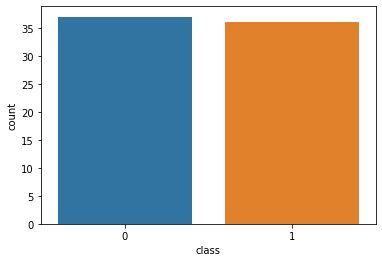

In [ ]:
sns.countplot(x='class',data=train_data)

In [ ]:
# Define a scaler to normalize input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [ ]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=1,drop_last=True)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12., 6 * 2 angles of 
        self.layer_1 = nn.Linear(12, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1) # prevents overfit
        self.batchnorm = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [ ]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


BinaryClassification(
  (layer_1): Linear(in_features=12, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.84336 | Acc: 36.000
Epoch 002: | Loss: 0.78230 | Acc: 39.000
Epoch 003: | Loss: 0.70033 | Acc: 55.000
Epoch 004: | Loss: 0.68230 | Acc: 58.000
Epoch 005: | Loss: 0.64675 | Acc: 66.000
Epoch 006: | Loss: 0.58387 | Acc: 78.000
Epoch 007: | Loss: 0.55647 | Acc: 78.000
Epoch 008: | Loss: 0.53009 | Acc: 80.000
Epoch 009: | Loss: 0.49221 | Acc: 80.000
Epoch 010: | Loss: 0.46622 | Acc: 86.000
Epoch 011: | Loss: 0.42317 | Acc: 88.000
Epoch 012: | Loss: 0.43510 | Acc: 88.000
Epoch 013: | Loss: 0.41155 | Acc: 88.000
Epoch 014: | Loss: 0.39283 | Acc: 88.000
Epoch 015: | Loss: 0.36620 | Acc: 89.000
Epoch 016: | Loss: 0.35439 | Acc: 89.000
Epoch 017: | Loss: 0.35883 | Acc: 91.000
Epoch 018: | Loss: 0.35550 | Acc: 86.000
Epoch 019: | Loss: 0.33675 | Acc: 88.000
Epoch 020: | Loss: 0.31121 | Acc: 91.000
Epoch 021: | Loss: 0.31726 | Acc: 91.000
Epoch 022: | Loss: 0.31868 | Acc: 91.000
Epoch 023: | Loss: 0.30948 | Acc: 88.000
Epoch 024: | Loss: 0.27956 | Acc: 92.000
Epoch 025: | Los

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
print(confusion_matrix(y_test, y_pred_list))
print(y_test)
print(y_pred_list)
print(classification_report(y_test, y_pred_list))

[[4 0]
 [1 3]]
56    1
34    0
51    1
21    0
24    0
46    1
37    1
13    0
Name: class, dtype: int64
[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8

